#  Analyzing Hotel Booking Cancellations


**Problem Statement**

Between 2015 and 2017, City Hotels and Resort Hotels experienced a significant increase in room cancellations, leading to substantial revenue losses. The objective of this analysis is to identify key factors driving cancellations, quantify the cancellation rates for each hotel type, and provide actionable insights to reduce future cancellations. This analysis aims to support stakeholders in understanding customer behavior and implementing data-driven strategies to enhance booking retention.

**Objectives**

* Cancellation Rates: Determine and compare the cancellation rates for City Hotels and Resort Hotels.
* Statistical Significance: Conduct hypothesis testing to assess whether the difference in cancellation rates between the two hotel types is statistically significant.
* Key Factors: Analyze and identify factors contributing to cancellations.
* Customer Segmentation: Examine which customer groups are more likely to cancel their bookings

**Hypotheses**

* Customers with longer lead times (time between booking and check-in) exhibit higher cancellation rates.
* Customers whose bookings were placed on a waiting list are more likely to cancel their bookings.
* Does Higher prices Contribute to hotel cancellations

### 1. Importing Important Libraries for Data Cleaning ,Preprocessing, Analyzing

In [5]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

###  2. Loading the Dataset

In [6]:
# importing dataset into dataframe 
df = pd.read_csv(r"D:\Career\Data_Analytics\Projects_practise\hotel_bookings_NC.csv")

| **Column Name**                 | **Description**                                                                                       |
|----------------------------------|-------------------------------------------------------------------------------------------------------|
| hotel                           | Indicates the type of hotel (resort or city). (Categorical)                                           |
| is_canceled                     | Specifies whether the booking was canceled or not (0=not canceled, 1=canceled). (Binary)             |
| lead_time                       | Represents the number of days between the booking date and the arrival date. (Numerical)             |
| arrival_date_year               | Denotes the year of the arrival date. (Categorical)                                                   |
| arrival_date_month              | Indicates the month of the arrival date. (Categorical)                                               |
| arrival_date_week_number        | Specifies the week number in which guests arrived at the hotel. (Numerical)                          |
| arrival_date_day_of_month       | Represents a specific day of arrival within a month. (Numerical)                                     |
| stays_in_weekend_nights         | Indicates how many nights (Saturday or Sunday) guests stayed or booked to stay during weekends. (Numerical) |
| stays_in_week_nights            | Represents how many weeknights (Monday to Friday) guests stayed or booked to stay. (Numerical)       |
| adults                          | Indicates the number of adults included in each booking. (Numerical)                                |
| children                        | Indicates the number of children included in each booking. (Numerical)                              |
| babies                          | Indicates the number of babies included in each booking. (Numerical)                                |
| meal                            | Describes what type of meal was booked (Breakfast only, Half board, Full board, Undefined/SC). (Categorical) |
| country                         | Denotes the country of origin for each guest who made a reservation. (Categorical)                   |
| market_segment                  | Shows various market segments that individuals belong to when making reservations. (Categorical)    |
| distribution_channel            | Specifies different channels through which bookings were made. (Categorical)                        |
| is_repeated_guest               | Indicates whether the guest is a repeated visitor (0=not repeated guest, 1=repeated guest). (Binary) |
| previous_cancellations          | Represents the number of times guests previously canceled their bookings. (Numerical)               |
| previous_bookings_not_canceled  | Denotes the count of previous bookings made by guests that were not canceled. (Numerical)           |
| reserved_room_type              | Identifies the type of room initially reserved. (Categorical)                                        |
| assigned_room_type              | Identifies the type of room that was assigned to guests. (Categorical)                              |
| booking_changes                 | Represents the number of changes made to the booking. (Numerical)                                   |
| deposit_type                    | Indicates the type of deposit made for the booking. (Categorical)                                   |
| agent                           | Represents the ID of the travel agency that made the booking. (Categorical)                        |
| company                         | Represents the ID of the company that made the booking. (Categorical)                              |
| days_in_waiting_list            | Represents the number of days the booking was on the waiting list before being confirmed. (Numerical) |
| customer_type                   | Indicates the type of customer (e.g., transient, contract, group, or other). (Categorical)          |
| adr                             | Represents the average daily rate (price per room) for the booking. (Numerical)                     |
| required_car_parking_spaces     | Indicates the number of car parking spaces required by the guest. (Numerical)                       |
| total_of_special_requests       | Represents the total number of special requests made by the guest. (Numerical)                      |
| reservation_status              | Indicates the status of the reservation (e.g., canceled, checked-in, no-show). (Categorical)        |
| reservation_status_date         | Represents the date on which the reservation status was last updated. (Date)                       |



## 3. Initial Inspection of the Dataset


In [7]:
# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)

In [8]:
# overview of dataset
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [13]:
# let's understand the size of dataset
print('Number of Rows and Columns in the dataset are :- ',df.shape)

Number of Rows and Columns in the dataset are :-  (119390, 33)


* Let's try to understand the various types of data store in datasets columns and their data types
* Try to understand the important columns for our analysis and verify their data type is correct or not
* Find columns that won't provide any useful information  

In [15]:
# Lets get more info about dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

* Dataset has  119390 rows , 33 columns 
* childern has float type which is incorrect number of children can only be whole numbers so we will set it to int
* converting reservation_status_date from object to datetime

### 4. Setting right data types for columns and giving meaningful names to them 

In [17]:
## renaming columns for better understability 
df = df.rename(columns={
    'hotel': 'hotel_type',
    'adr': 'avg_daily_rate',
    'country' : 'country_code',
    'index' : 'index_id'
})
df.columns

Index(['index_id', 'hotel_type', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country_code', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'avg_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
# changing data types of childers , agent_id , company_id as they are float 
df['children'] = df['children'].astype('Int32')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

print('children id data type :- ',df['children'].dtype)
print('reservation_status_date id data type :- ',df['reservation_status_date'].dtype)

children id data type :-  Int32
reservation_status_date id data type :-  datetime64[ns]


### 5. Checking and Removing Duplicates

In [23]:
print('Viewing  Duplicates Rows ')
df[df.duplicated()]

Viewing  Duplicates Rows 


,index_id,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country_code,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [25]:
#checking number of duplicates
print('Number of Duplicates  :- ',df.duplicated().sum())

# checking for duplicates in index_id column as we want only unique values 
print('Number of Duplicates in index_id  :- ',df['index_id'].duplicated().sum())

Number of Duplicates  :-  0
Number of Duplicates in index_id  :-  0


* No  Duplicates Found in the dataset

### 6.a Check for Missing Values 

In [27]:
print('Number of Missing Values in the dataset :- \n',df.isna().sum())

Number of Missing Values in the dataset :- 
 index_id                               0
hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country_code                         488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type

* Around 488 values are missing in country column and 4 values in childred columns are missing
* 16,340 values are missing in agent column
* 1,12,593 values are missing in company column which is extremely high as the dataset has 1,19,390 rows in total
* I will consider dropping these values because agent_id and company_id columns will not be required for our Analysis

### 6.b Treating missing Values

In [29]:
### dropping agent_id , company_id
df.drop(['agent','company'],axis = 1 , inplace = True)

#### Understanding the Distribution Channel Values
| **Title**        | **Description**                                                                                                                 |
|------------------|---------------------------------------------------------------------------------------------------------------------------------|
| **Direct**       | This indicates that the booking was made directly with the hotel or business, bypassing any third-party intermediaries like OTAs or GDS. |
| **Corporate**    | This suggests that the booking was made through a corporate travel agency or directly by a corporation.                         |
| **TA/TO**        | This likely refers to Travel Agents or Tour Operators. These intermediaries facilitate bookings on behalf of their clients.      |
| **Undefined**    | This category might represent bookings where the distribution channel could not be determined or is unknown.                    |
| **GDS**          | This stands for Global Distribution Systems. GDSs connect travel suppliers with travel agencies and corporate travel departments. |



* we can notice that country column has country code it is difficult to interpret we will map each country code to respective country name

In [31]:
# Mapping of country codes to full country names
country_map = {
    'PRT': 'Portugal', 'GBR': 'United Kingdom', 'USA': 'United States of America',
    'ESP': 'Spain', 'IRL': 'Ireland', 'FRA': 'France', 'ROU': 'Romania', 'NOR': 'Norway',
    'OMN': 'Oman', 'ARG': 'Argentina', 'POL': 'Poland', 'DEU': 'Germany', 'BEL': 'Belgium',
    'CHE': 'Switzerland', 'CN': 'China', 'GRC': 'Greece', 'ITA': 'Italy', 'NLD': 'Netherlands',
    'DNK': 'Denmark', 'RUS': 'Russia', 'SWE': 'Sweden', 'AUS': 'Australia', 'EST': 'Estonia',
    'CZE': 'Czech Republic', 'BRA': 'Brazil', 'FIN': 'Finland', 'MOZ': 'Mozambique', 'BWA': 'Botswana',
    'LUX': 'Luxembourg', 'SVN': 'Slovenia', 'ALB': 'Albania', 'IND': 'India', 'CHN': 'China',
    'MEX': 'Mexico', 'MAR': 'Morocco', 'UKR': 'Ukraine', 'SMR': 'San Marino', 'LVA': 'Latvia',
    'PRI': 'Puerto Rico', 'SRB': 'Serbia', 'CHL': 'Chile', 'AUT': 'Austria', 'BLR': 'Belarus',
    'LTU': 'Lithuania', 'TUR': 'Turkey', 'ZAF': 'South Africa', 'AGO': 'Angola', 'ISR': 'Israel',
    'CYM': 'Cayman Islands', 'ZMB': 'Zambia', 'CPV': 'Cape Verde', 'ZWE': 'Zimbabwe', 'DZA': 'Algeria',
    'KOR': 'South Korea', 'CRI': 'Costa Rica', 'HUN': 'Hungary', 'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia', 'JAM': 'Jamaica', 'HRV': 'Croatia', 'HKG': 'Hong Kong', 'IRN': 'Iran', 'GEO': 'Georgia',
    'AND': 'Andorra', 'GIB': 'Gibraltar', 'URY': 'Uruguay', 'JEY': 'Jersey', 'CAF': 'Central African Republic',
    'CYP': 'Cyprus', 'COL': 'Colombia', 'GGY': 'Guernsey', 'KWT': 'Kuwait', 'NGA': 'Nigeria', 'MDV': 'Maldives',
    'VEN': 'Venezuela', 'SVK': 'Slovakia', 'FJI': 'Fiji', 'KAZ': 'Kazakhstan', 'PAK': 'Pakistan', 'IDN': 'Indonesia',
    'LBN': 'Lebanon', 'PHL': 'Philippines', 'SEN': 'Senegal', 'SYC': 'Seychelles', 'AZE': 'Azerbaijan', 'BHR': 'Bahrain',
    'NZL': 'New Zealand', 'THA': 'Thailand', 'DOM': 'Dominican Republic', 'MKD': 'North Macedonia', 'MYS': 'Malaysia',
    'ARM': 'Armenia', 'JPN': 'Japan', 'LKA': 'Sri Lanka', 'CUB': 'Cuba', 'CMR': 'Cameroon', 'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius', 'COM': 'Comoros', 'SUR': 'Suriname', 'UGA': 'Uganda', 'BGR': 'Bulgaria', 'CIV': 'Ivory Coast',
    'JOR': 'Jordan', 'SYR': 'Syria', 'SGP': 'Singapore', 'BDI': 'Burundi', 'SAU': 'Saudi Arabia', 'VNM': 'Vietnam',
    'PLW': 'Palau', 'QAT': 'Qatar', 'EGY': 'Egypt', 'PER': 'Peru', 'MLT': 'Malta', 'MWI': 'Malawi', 'ECU': 'Ecuador',
    'MDG': 'Madagascar', 'ISL': 'Iceland', 'UZB': 'Uzbekistan', 'NPL': 'Nepal', 'BHS': 'Bahamas', 'MAC': 'Macau', 'TGO': 'Togo',
    'TWN': 'Taiwan', 'DJI': 'Djibouti', 'STP': 'São Tomé and Príncipe', 'KNA': 'Saint Kitts and Nevis', 'ETH': 'Ethiopia',
    'IRQ': 'Iraq', 'HND': 'Honduras', 'RWA': 'Rwanda', 'KHM': 'Cambodia', 'MCO': 'Monaco', 'BGD': 'Bangladesh', 'IMN': 'Isle of Man',
    'TJK': 'Tajikistan', 'NIC': 'Nicaragua', 'BEN': 'Benin', 'VGB': 'British Virgin Islands', 'TZA': 'Tanzania', 'GAB': 'Gabon',
    'GHA': 'Ghana', 'TMP': 'East Timor', 'GLP': 'Guadeloupe', 'KEN': 'Kenya', 'LIE': 'Liechtenstein', 'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro', 'UMI': 'United States Minor Outlying Islands', 'MYT': 'Mayotte', 'FRO': 'Faroe Islands', 'MMR': 'Myanmar',
    'PAN': 'Panama', 'BFA': 'Burkina Faso', 'LBY': 'Libya', 'MLI': 'Mali', 'NAM': 'Namibia', 'BOL': 'Bolivia', 'PRY': 'Paraguay',
    'BRB': 'Barbados', 'ABW': 'Aruba', 'AIA': 'Anguilla', 'SLV': 'El Salvador', 'DMA': 'Dominica', 'PYF': 'French Polynesia',
    'GUY': 'Guyana', 'LCA': 'Saint Lucia', 'ATA': 'Antarctica', 'GTM': 'Guatemala', 'ASM': 'American Samoa', 'MRT': 'Mauritania',
    'NCL': 'New Caledonia', 'KIR': 'Kiribati', 'SDN': 'Sudan', 'ATF': 'French Southern Territories', 'SLE': 'Sierra Leone',
    'LAO': 'Laos'
}

# Create a new column with the full country names
df['country_name'] = df['country_code'].map(country_map)

# Check the dataframe
print(df[['country_code', 'country_name']].head())


  country_code    country_name
0          PRT        Portugal
1          PRT        Portugal
2          GBR  United Kingdom
3          GBR  United Kingdom
4          GBR  United Kingdom


In [33]:
# We will impute country name and country code with 'unknown'  for missing values in these columns

df['country_name'] = df['country_name'].fillna('Unknown')
df['country_code'] = df['country_code'].fillna('Unknown')

print('Nulls in the following columns \n ',df[['country_code','country_name']].isna().sum())

Nulls in the following columns 
  country_code    0
country_name    0
dtype: int64


In [35]:
# checking any missing value pending in the  dataset 
df.isna().sum()

index_id                          0
hotel_type                        0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country_code                      0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
avg_daily_rate                    0
required_car_parking_spaces 

###  7. Feature Engineering

In [37]:
###creating a column to check if customer got the same room as they have reserved
# new column to indicate if the assigned room is the same as the reserved room
df['room_match'] = df.apply(
    lambda x: 'Same' if x['reserved_room_type'] == x['assigned_room_type'] else 'Different',
    axis=1
)

# Step 2: Preview the dataset to confirm the new column
print(df[['reserved_room_type', 'assigned_room_type', 'room_match']].head())


  reserved_room_type assigned_room_type room_match
0                  C                  C       Same
1                  C                  C       Same
2                  A                  C  Different
3                  A                  A       Same
4                  A                  A       Same


In [41]:
## total number of night stayed 
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

## total number of guests 
df['total_guests'] = df['adults'] + df['children'] + df['babies']



### 6. Handling Outliers

In [43]:
## removing rows where adult + child + baby guest count is zero or total guest count is zero

df = df[df['total_guests'] != 0]

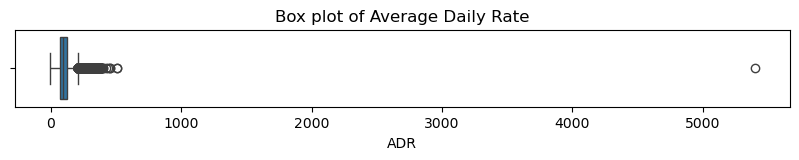

In [45]:
### checking for outliers in average daily rate as we going to use it in our analysis
plt.figure(figsize = (10,1))
sns.boxplot(x='avg_daily_rate', data =df)
plt.title('Box plot of Average Daily Rate')
plt.xlabel('ADR')
plt.show()


In [47]:
## there is a single value that is far from other values so  i will remove it 
df = df[df['avg_daily_rate'] < 1000]

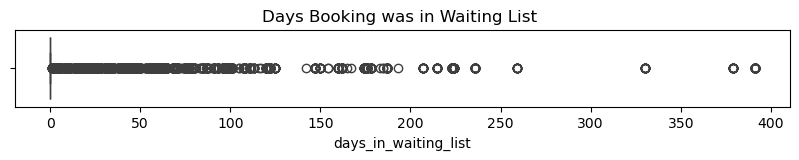

In [49]:
### cheacking for outliers in days in  waiting list ( means how many days booking was in waiting list) 
plt.figure(figsize = (10,1))
sns.boxplot(x='days_in_waiting_list', data = df)
plt.title('Days Booking was in Waiting List ')
plt.show()

In [51]:
# checking the 96 percentile value to understand the how many days booking was in wainting list
percentile_96 = df['days_in_waiting_list'].quantile(0.96)
print(f"96th Percentile: {percentile_96}")

96th Percentile: 0.0


* As 96% of the data points are below zero and minimum value is zero which indicates that almost 95% of bookings were confirmed within 24 hrs
* As only 5% of bookings had waiting peroid of more than 24 hrs i will cap these outliers  to the value  so that it not should affect the  mean  

In [53]:
# Calculate the 97th percentile for the upper bound
upper_percentile = df['days_in_waiting_list'].quantile(0.97)

# Cap values above the 97th percentile to the 97th percentile value
df['days_in_waiting_list'] = df['days_in_waiting_list'].apply(lambda x: min(x, upper_percentile))

# Check the result
print("Capped values for 'days_in_waiting_list':")
print(df['days_in_waiting_list'].describe())


Capped values for 'days_in_waiting_list':
count    119205.000000
mean          0.183239
std           1.028863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: days_in_waiting_list, dtype: float64


### Understanding Data

In [55]:
# getting descriptive statistics about the numerical data and it will also give us idea of any potential outliers in these columns with the help of min and max 
df.describe()

,index_id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,avg_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stay_nights,total_guests
count,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.0,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205.000000,119205,119205.000000,119205.0
mean,59656.666079,0.370739,104.113200,2016.156512,27.163324,15.798951,0.927067,2.499216,1.859192,0.104048,0.007961,0.031500,0.087194,0.137100,0.218800,0.183239,101.927075,0.062556,0.571486,2016-07-31 11:55:55.379388160,3.426282,1.971201
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,1.0
25%,29808.000000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2016-02-02 00:00:00,2.000000,2.0
50%,59639.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2016-08-05 00:00:00,3.000000,2.0
75%,89485.000000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00,4.000000,2.0
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.0,10.000000,1.000000,26.000000,72.000000,18.000000,6.000000,510.000000,8.000000,5.000000,2017-12-09 00:00:00,69.000000,55.0
std,34460.567005,0.483005,106.875898,0.707468,13.601298,8.781020,0.995122,1.897112,0.575188,0.398843,0.097511,0.174666,0.844936,1.498168,0.638513,1.028863,48.041879,0.245364,0.792877,NaN,2.540698,0.718885


* we have data from 2015 to 2017 
* as per the descriptive statistics calculated  the values look good and free from erorrs and outliers

In [57]:
df.describe(include = 'object')


,hotel_type,arrival_date_month,meal,country_code,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,country_name,room_match
count,119205,119205,119205,119205,119205,119205,119205,119205,119205,119205,119205,119205,119205
unique,2,12,5,178,7,5,9,11,3,4,3,177,2
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Portugal,Same
freq,79158,13857,92231,48478,56407,97749,85872,74019,104457,89475,75011,48478,104409


In [59]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

hotel_type
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country_code
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 

* As per above Descriptive statistics calculated for numeric and object data types we haven't notice any errors and outliers . So the data looks free from erorr and outliers
* We have also validated the data by checking that each column stored the values it should be having

In [492]:
df.to_csv('D:\\Career\\Data_Analytics\\Projects_practise\\clean_hotel_booking_dataset.csv', index=False)

## Cancellation Analysis

##### What is the overall cancellation rate?

In [61]:
# Overall cancellations rate
total_bookings  = len(df)         # total bookings

total_canceled_bookings = len(df[df['is_canceled'] == 1])    # Total Canceled Bookings

#cancellation rate
cancellation_rate = (total_canceled_bookings / total_bookings)*100
print(f'Cancellation Rate :- {cancellation_rate:.2f}%')

Cancellation Rate :- 37.07%


* The total cancellation rate for both resort and city hotel combined is 37% which reasonably a high number.

##### What percentage of bookings were canceled for each hotel type?

In [63]:
## cancellation rate by hotel type 
cancellations_rate_by_hotel = df.groupby('hotel_type')['is_canceled'].mean() * 100
cancellations_rate_by_hotel = cancellations_rate_by_hotel.round(2)

print('Cancellations rate by hotel type:')
print(cancellations_rate_by_hotel)


Cancellations rate by hotel type:
hotel_type
City Hotel      41.78
Resort Hotel    27.77
Name: is_canceled, dtype: float64


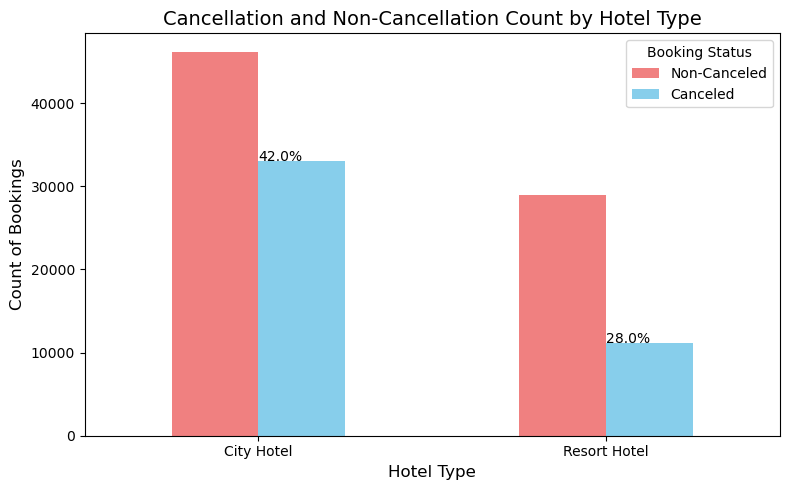

In [65]:
# Calculate the count of canceled and non-canceled bookings for each hotel type
cancellations_count = df.groupby(['hotel_type', 'is_canceled']).size().unstack(fill_value=0)

# Plotting the bar chart
ax = cancellations_count.plot(kind='bar', stacked=False, color=['lightcoral', 'skyblue'], figsize=(8, 5))

# title and labels
plt.title('Cancellation and Non-Cancellation Count by Hotel Type', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count of Bookings', fontsize=12)
plt.xticks(rotation=0)  # Keeps hotel types horizontal
plt.legend(['Non-Canceled', 'Canceled'], title='Booking Status')

# Adding cancellation percentage exactly above the canceled bars
for i, (non_canceled, canceled) in enumerate(cancellations_count.values):
    total = non_canceled + canceled
    canceled_percent = round((canceled / total) * 100)
    
    # Position the text exactly above the canceled bar
    ax.text(i, canceled + 5, f'{canceled_percent:.1f}%', ha='left', fontsize=10, color='black')

# Display the chart
plt.tight_layout()
plt.show()



* City Hotel: 42% of all bookings were canceled.
* Resort Hotel: 28% of all bookings were canceled.
* City Hotels have more cancellations than Resort Hotels .
* Further I will conduct a **hypothesis test** to check whether this difference in cancellations rate for city hotels and resort hotels  is by chance or has statistical significance to it

##### What percentage of all cancellations come from each hotel type?

In [67]:
cancellations_rate_by_hotel = (
    df[df['is_canceled'] == 1]['hotel_type'].value_counts(normalize=True) * 100
)
cancellations_rate_by_hotel

hotel_type
City Hotel      74.838213
Resort Hotel    25.161787
Name: proportion, dtype: float64

* City Hotel: Out of total cancellations 74.84% cancellations come from City Hotel.
* Resort Hotel: Out of total cancellations 25.16% cancellations come from Resort Hotel.
* I will conduct a hypothesis test to determine if there is a statistically significant difference in cancellation rates between resort and city hotels.

### Hypothesis Test (Two-Proportion Z-Test)
**Objective:**
Determine if the cancellation rates (41.73% for City Hotel and 27.76% for Resort Hotel) are significantly different.

**Test:** Perform a two-proportion z-test because we are comparing two proportions (cancellation rates for City Hotel and Resort Hotel).

**Use Case:** This will help us understand whether cancellations are more likely in one hotel type compared to the other.

**Hypotheses:**

* **Null Hypothesis (H0):**  The cancellation rates for City Hotels and Resort Hotels are equal.
* **Alternative Hypothesis (H1):** The cancellation rates for City Hotels and Resort Hotels are not equal.
 

**Key Considerations:**

* Data: The provided data (41.78% cancellation rate for City Hotels and 27.77% for Resort Hotels, and their respective contributions to the overall cancellations) will be used to conduct the Two-Proportion Z-Test.
* **Significance Level is 5% or 0.05.**

**Assumptions:**
* The test assumes independent samples and sufficient sample sizes in both groups. 
* Samples are taken randomly
  
* n1 : Total bookings for city hotels.
* x1 : Number of cancellations for city hotels.
* n2 : Total bookings for resort hotels.
* x2 : Number of cancellations for resort hotels.

In [69]:
## Conduct the Two-Proportion Z-Test
from statsmodels.stats.proportion import proportions_ztest

resort_data = df[df['hotel_type'] == 'Resort Hotel']
city_data = df[df['hotel_type'] == 'City Hotel']

# Calculate total bookings and cancellations for each group
n1 = len(city_data)                   # Total bookings for City Hotels
x1 = city_data['is_canceled'].sum()   # Total cancellations for City Hotels

n2 = len(resort_data)                 # Total bookings for Resort Hotels
x2 = resort_data['is_canceled'].sum() # Total cancellations for Resort Hotels

# Input values for Z-test
count = [x1, x2]    # Number of cancellations in each group
nobs = [n1, n2]     # Total bookings in each group

# Perform the test
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Output the results
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in cancellation rates between the two hotel types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cancellation rates between the two hotel types.")

Z-Statistic: 47.32
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in cancellation rates between the two hotel types.


Interpretation of Results:
1. Z-Statistic:
Since the Z-statistic is positive, it confirms that **City Hotels have a higher cancellation rate than Resort Hotels.**

2. P-Value:
A P-value of 0.0000 (< 0.05) provides strong evidence to reject the null hypothesis.

**Conclusion:**
Since the P-value is less than 0.05 (significance level), we reject the null hypothesis. This confirms a statistically significant difference in cancellation rates, with **City Hotels** having a higher cancellation rate than **Resort Hotels.**

##### Calculating cancellation rates by customer type for city hotels and resort hotels

In [71]:
# Cancellation rate by customer type for City Hotels
city_hotel_cancellations = df[df['hotel_type'] == 'City Hotel'].groupby('customer_type')['is_canceled'].mean() * 100
print('Cancellation Rate By Customer Type for City Hotel:')
print(city_hotel_cancellations.round(2).sort_values(ascending=False))

# Cancellation rate by customer type for Resort Hotels
resort_hotel_cancellations = df[df['hotel_type'] == 'Resort Hotel'].groupby('customer_type')['is_canceled'].mean() * 100
print('\nCancellation Rate By Customer Type for Resort Hotel:')
print(resort_hotel_cancellations.round(2).sort_values(ascending=False))


Cancellation Rate By Customer Type for City Hotel:
customer_type
Contract           48.13
Transient          45.69
Transient-Party    28.10
Group               9.97
Name: is_canceled, dtype: float64

Cancellation Rate By Customer Type for Resort Hotel:
customer_type
Transient          31.17
Transient-Party    19.51
Group              10.25
Contract            8.84
Name: is_canceled, dtype: float64


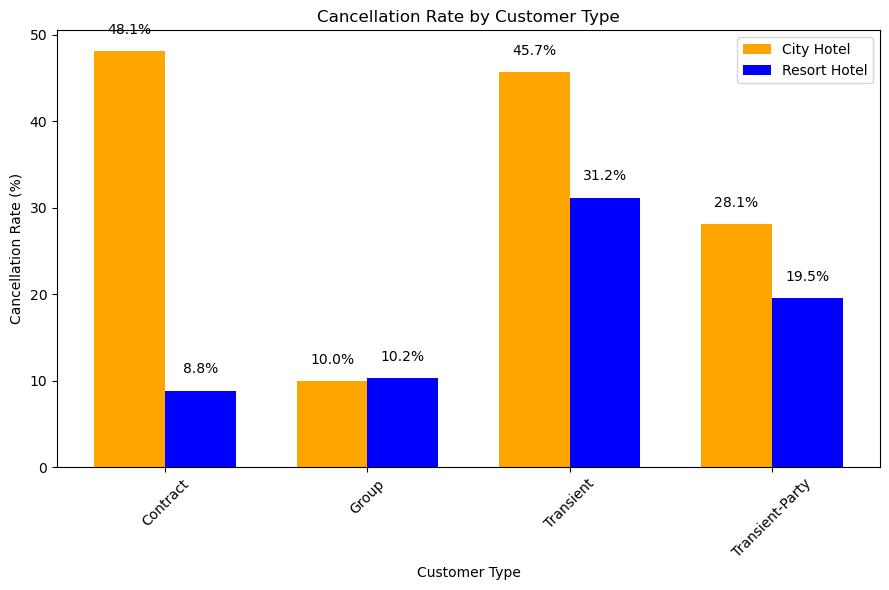

In [73]:
# Calculate cancellation rates for each hotel type
city_hotel_cancellations = df[df['hotel_type'] == 'City Hotel'].groupby('customer_type')['is_canceled'].mean() * 100
resort_hotel_cancellations = df[df['hotel_type'] == 'Resort Hotel'].groupby('customer_type')['is_canceled'].mean() * 100

# Align customer types for both hotels
customer_types = sorted(set(city_hotel_cancellations.index) | set(resort_hotel_cancellations.index))

# Prepare data for plotting
city_values = [city_hotel_cancellations.get(ct, 0) for ct in customer_types]
resort_values = [resort_hotel_cancellations.get(ct, 0) for ct in customer_types]

# Plot the bar chart with specified figure size
plt.figure(figsize=(9, 6))  # Adjust the figure size as needed

x = np.arange(len(customer_types))  # X positions for the bars
width = 0.35  # Width of each bar

plt.bar(x - width/2, city_values, width, color='orange', label='City Hotel')
plt.bar(x + width/2, resort_values, width, color='blue', label='Resort Hotel')

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Customer Type')
plt.xticks(x, customer_types, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Display the percentage values above the bars
for i in range(len(customer_types)):
    # City hotel percentages
    plt.text(x[i] - width/2, city_values[i] + 2, f'{city_values[i]:.1f}%', ha='center', fontsize=10, color='black')
    # Resort hotel percentages
    plt.text(x[i] + width/2, resort_values[i] + 2, f'{resort_values[i]:.1f}%', ha='center', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()



**City Hotels :-** 
* **Contract (48.1%) and Transient (45.7%) customers** have the highest cancellation rates, indicating that these customer types are significantly more likely to cancel their bookings.
* The high cancellations among **contract customers** could suggest that their contracts expired during this period or were influenced by changes in the hotel's terms and conditions.

**Resort Hotels :-**
* **Transient customers (31.2%)** account for the majority of cancellations at resort hotels.


* The consistently high cancellations among transient customers for both city and resort hotels could be attributed to last-minute changes in their plans. As Transient customers typically include walk-in guests, last-minute bookers, or those requiring short-term stays, making their bookings more prone to cancellations.

##### Calculate the percentage of total cancellations contributed by each customer type for City and Resort Hotels

In [75]:
# Cancellation rate by customer type for City Hotels
city_hotel_cancellations = df[df['hotel_type'] == 'City Hotel']
cancellation_rate_city_hotel = (
    city_hotel_cancellations[city_hotel_cancellations['is_canceled'] == 1]['customer_type']
    .value_counts(normalize=True) * 100
)
print('Percentage of Total Cancellations by Customer Type for City Hotel:')
print(cancellation_rate_city_hotel.round(2).sort_values(ascending=False))

# Cancellation rate by customer type for Resort Hotels
resort_hotel_cancellations = df[df['hotel_type'] == 'Resort Hotel']
cancellation_rate_resort_hotel = (
    resort_hotel_cancellations[resort_hotel_cancellations['is_canceled'] == 1]['customer_type']
    .value_counts(normalize=True) * 100
)
print('\nPercentage of Total Cancellations by Customer Type for Resort Hotel:')
print(cancellation_rate_resort_hotel.round(2).sort_values(ascending=False))


Percentage of Total Cancellations by Customer Type for City Hotel:
customer_type
Transient          81.87
Transient-Party    14.70
Contract            3.34
Group               0.09
Name: proportion, dtype: float64

Percentage of Total Cancellations by Customer Type for Resort Hotel:
customer_type
Transient          84.67
Transient-Party    13.66
Contract            1.41
Group               0.26
Name: proportion, dtype: float64


* We notice that out of total cancellations made **82.57% for city Hotels and 84.67% for Resort Hotels** came from Transient customers. Indicating that Transient Customers are more Likely to canceled their bookings.

##### Determine if there is any difference in lead time (difference between arrival time and booking time) between canceled and not canceled booking  for city and resort hotels

In [77]:
## Lead Time For Not Canceled Bookings
# Average lead time for each customer type for City Hotels
city_hotel_avg_lead_time = df[(df['hotel_type'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby('customer_type')['lead_time'].agg(['mean', 'median'])

# Average lead time for each customer type for Resort Hotels
resort_hotel_avg_lead_time = df[(df['hotel_type'] == 'Resort Hotel') & (df['is_canceled'] == 0)].groupby('customer_type')['lead_time'].agg(['mean', 'median'])

# Print results for both hotels
print('Average and Median Lead Time for Each Customer Type for City Hotel (Not Canceled Bookings):')
print(city_hotel_avg_lead_time.round(2))

print('\nAverage and Median Lead Time for Each Customer Type for Resort Hotel (Not Canceled Bookings):')
print(resort_hotel_avg_lead_time.round(2))


Average and Median Lead Time for Each Customer Type for City Hotel (Not Canceled Bookings):
                   mean  median
customer_type                  
Contract          35.38    16.0
Group             54.52    23.5
Transient         63.66    39.0
Transient-Party  130.26    97.0

Average and Median Lead Time for Each Customer Type for Resort Hotel (Not Canceled Bookings):
                   mean  median
customer_type                  
Contract         161.36   155.0
Group             35.09     5.0
Transient         59.97    25.0
Transient-Party  121.96    85.0


In [79]:
## Lead Time For  Canceled Bookings
# Average lead time for each customer type for City Hotels (for canceled bookings)
city_hotel_avg_lead_time = df[(df['hotel_type'] == 'City Hotel') & (df['is_canceled'] == 1)].groupby('customer_type')['lead_time'].agg(['mean', 'median'])

# Average lead time for each customer type for Resort Hotels (for canceled bookings)
resort_hotel_avg_lead_time = df[(df['hotel_type'] == 'Resort Hotel') & (df['is_canceled'] == 1)].groupby('customer_type')['lead_time'].agg(['mean', 'median'])

# Print results for both hotels
print('Average and Median Lead Time for Each Customer Type for City Hotel (Canceled Bookings):')
print(city_hotel_avg_lead_time.round(2))

print('\nAverage and Median Lead Time for Each Customer Type for Resort Hotel (Canceled Bookings):')
print(resort_hotel_avg_lead_time.round(2))


Average and Median Lead Time for Each Customer Type for City Hotel (Canceled Bookings):
                   mean  median
customer_type                  
Contract         225.13   279.0
Group             84.21    20.0
Transient        143.35   111.0
Transient-Party  172.73   145.0

Average and Median Lead Time for Each Customer Type for Resort Hotel (Canceled Bookings):
                   mean  median
customer_type                  
Contract         194.89   200.0
Group            210.69   328.0
Transient        125.14   106.0
Transient-Party  142.39   123.0


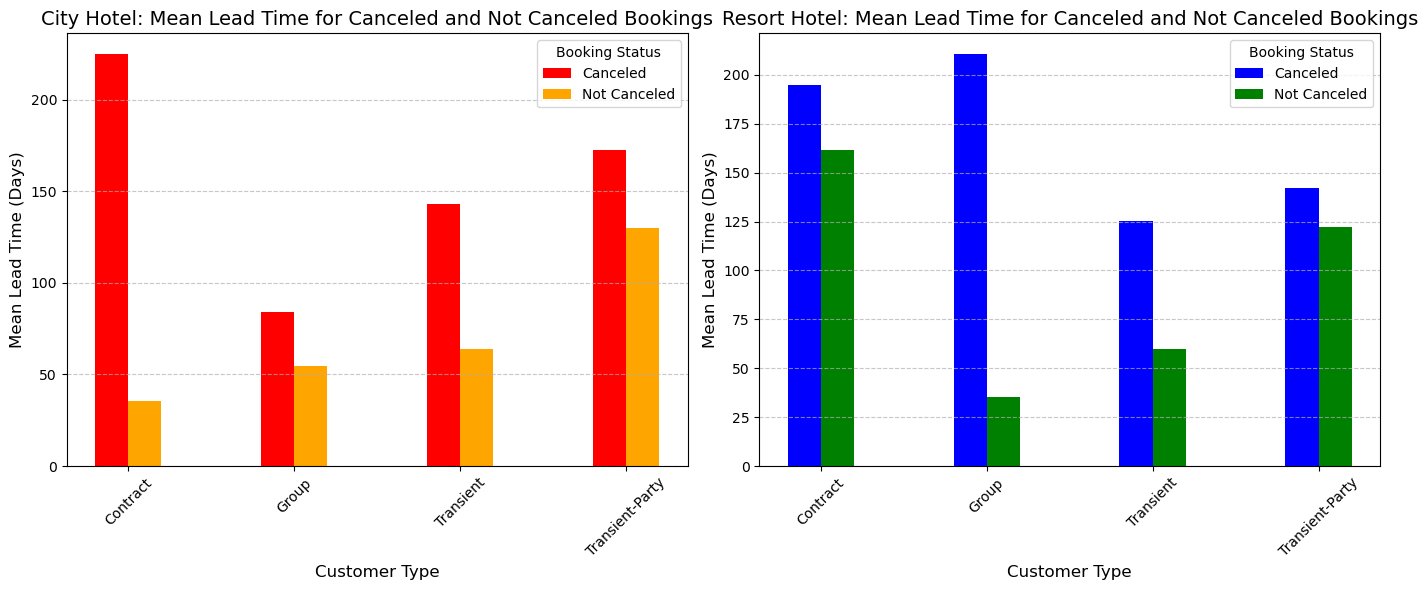

In [81]:
# Calculate mean lead times for canceled and not canceled bookings
mean_lead_times = (
    df.groupby(['hotel_type', 'customer_type', 'is_canceled'])['lead_time']
    .mean()
    .reset_index()
)

# Pivot the data for easier plotting
pivot_table = mean_lead_times.pivot(
    index='customer_type', columns=['hotel_type', 'is_canceled'], values='lead_time'
)


# Extracting the required columns for plotting for City Hotel and Resort Hotel separately
city_canceled = pivot_table[('City Hotel', 1)]  # Canceled
city_not_canceled = pivot_table[('City Hotel', 0)]  # Not Canceled
resort_canceled = pivot_table[('Resort Hotel', 1)]  # Canceled
resort_not_canceled = pivot_table[('Resort Hotel', 0)]  # Not Canceled

# subplots, one for City Hotel and one for Resort Hotel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for City Hotel
x = np.arange(len(pivot_table.index))  # Label locations
width = 0.2  # Width of the bars
ax1.bar(x - width/2, city_canceled, width, label='Canceled', color='red')
ax1.bar(x + width/2, city_not_canceled, width, label='Not Canceled', color='orange')

# Adding labels and titles for City Hotel
ax1.set_xlabel('Customer Type', fontsize=12)
ax1.set_ylabel('Mean Lead Time (Days)', fontsize=12)
ax1.set_title('City Hotel: Mean Lead Time for Canceled and Not Canceled Bookings', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(pivot_table.index, rotation=45, fontsize=10)
ax1.legend(title='Booking Status', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Resort Hotel
ax2.bar(x - width/2, resort_canceled, width, label='Canceled', color='blue')
ax2.bar(x + width/2, resort_not_canceled, width, label='Not Canceled', color='green')

# Adding labels and titles for Resort Hotel
ax2.set_xlabel('Customer Type', fontsize=12)
ax2.set_ylabel('Mean Lead Time (Days)', fontsize=12)
ax2.set_title('Resort Hotel: Mean Lead Time for Canceled and Not Canceled Bookings', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(pivot_table.index, rotation=45, fontsize=10)
ax2.legend(title='Booking Status', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


* If We compare the average  lead time for both hotels canceled and not canceled bookings by each customer type then we can notice that :-

**City Hotels**
* The mean lead time for Contract customers with canceled bookings is 225 days (median: 279 days), while for not canceled bookings, it is significantly lower at 35 days (median: 16 days).
* Transient customers, who also account for high cancellation rates, show a mean lead time of 143 days (median: 111 days) for canceled bookings, compared to 63 days (median: 39 days) for not canceled bookings.
* The significant differences in lead times between canceled and not canceled bookings suggest that Contract and Transient customers with lead times greater than 100 days (over 3.5 months) are more likely to cancel their bookings.


**Resort Hotels**
* Transient customers, the primary contributors to cancellations, have a mean lead time of 125 days (median: 106 days) for canceled bookings, compared to 60 days (median: 25 days) for not canceled bookings.
* Transient customers with lead times greater than 120 days (4 months) are more prone to canceling their bookings. 
 
**Suggestions**
* Targeted Policies:
For bookings with high lead times, consider implementing stricter cancellation policies or incentivizing commitment through discounts or non-refundable rates.
Proactive Customer Engagement:
Reach out to customers with long lead times closer to their check-in date to confirm their plans or provide offers to retain the booking.

* Next, I will create lead time buckets (e.g., 0-30 days, 31-60 days, and so on) to analyze the cancellation rate within each bucket.

In [83]:
# Step 1: Create lead time buckets and add them to the dataframe
df['lead_time_bucket'] = pd.cut(
    df['lead_time'], 
    bins=range(0, df['lead_time'].max() + 30, 30), 
    labels=[f"{i}-{i+29}" for i in range(0, df['lead_time'].max(), 30)], 
    right=False
)

# Step 2: Calculate cancellation rate for each lead time bucket grouped by hotel type
cancellation_rate_by_hotel = (
    df.groupby(['hotel_type', 'lead_time_bucket'], observed=True)['is_canceled']  # Use 'hotel' instead of 'hotel_type'
    .mean()
    .unstack(level=0)  # Separate data for each hotel type
    * 100
)

# Step 3: Print the cancellation rates for each hotel type
print("Cancellation Rate by Lead Time Bucket and Hotel Type:")
print(cancellation_rate_by_hotel.round(2))


Cancellation Rate by Lead Time Bucket and Hotel Type:
hotel_type        City Hotel  Resort Hotel
lead_time_bucket                          
0-29                   21.91         12.74
30-59                  38.97         30.34
60-89                  41.62         35.25
90-119                 46.38         38.34
120-149                44.75         41.15
150-179                53.31         32.52
180-209                49.15         36.88
210-239                50.65         41.83
240-269                59.17         48.42
270-299                72.91         38.69
300-329                75.52         48.98
330-359                82.38         40.32
360-389                75.36         27.45
390-419                61.90         67.42
420-449                73.42         25.00
450-479                63.52         73.08
480-509                82.93           NaN
510-539                81.82          0.00
540-569               100.00          0.00
570-599               100.00           NaN


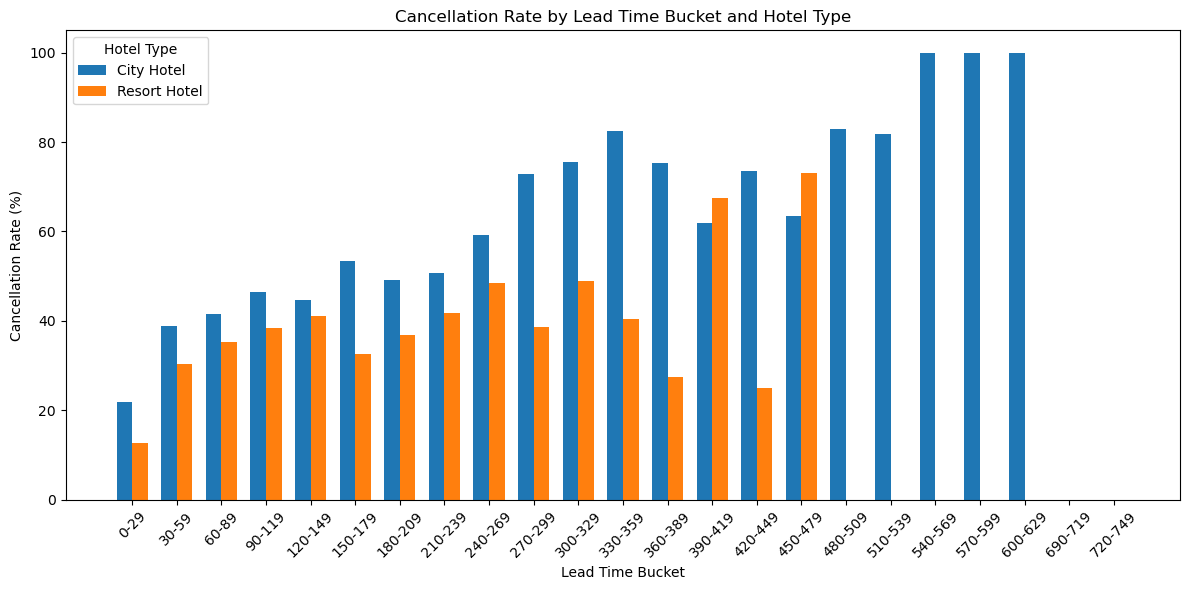

In [85]:
# Calculate the cancellation rate for each lead time bucket and hotel type
df['lead_time_bucket'] = pd.cut(
    df['lead_time'], 
    bins=range(0, df['lead_time'].max() + 30, 30), 
    labels=[f"{i}-{i+29}" for i in range(0, df['lead_time'].max(), 30)], 
    right=False
)

cancellation_rate_by_hotel = (
    df.groupby(['hotel_type', 'lead_time_bucket'], observed=True)['is_canceled']
    .mean()
    .unstack(level=0)  # Separate data for each hotel type
    * 100
)

# Plotting the grouped bar chart
lead_time_buckets = cancellation_rate_by_hotel.index
hotel_types = cancellation_rate_by_hotel.columns
x = range(len(lead_time_buckets))  # X-axis positions for lead time buckets
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each hotel type
for i, hotel_type in enumerate(hotel_types):
    ax.bar(
        [pos + i * width for pos in x],  # Adjust position for each hotel type
        cancellation_rate_by_hotel[hotel_type],
        width,
        label=hotel_type
    )

# Add labels, title, and legend
ax.set_xlabel('Lead Time Bucket')
ax.set_ylabel('Cancellation Rate (%)')
ax.set_title('Cancellation Rate by Lead Time Bucket and Hotel Type')
ax.set_xticks([pos + width/2 for pos in x])  # Center x-ticks
ax.set_xticklabels(lead_time_buckets, rotation=45)  # Rotate for better readability
ax.legend(title='Hotel Type')

# Display the plot
plt.tight_layout()
plt.show()

Observations:
High Cancellation Rates for Long Lead Times:

* City Hotels consistently show higher cancellation rates compared to Resort Hotels across most lead time buckets.
* Cancellation rates generally increase with longer lead times for both hotel types, though there are some fluctuations in specific buckets.

##### Do canceled bookings have a longer waiting time on the waiting list compared to bookings that were not canceled?

In [79]:
# mean days the booking was in waiting list for not canceled bookings for both city and resort hotels
# Average days in waiting list for each customer type for City Hotels (for not canceled bookings)
city_hotel_avg_lead_time = df[(df['hotel_type'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby('customer_type')['days_in_waiting_list'].agg(['mean', 'median'])

# Average days in waiting list for each customer type for Resort Hotels (for not canceled bookings)
resort_hotel_avg_lead_time = df[(df['hotel_type'] == 'Resort Hotel') & (df['is_canceled'] == 0)].groupby('customer_type')['days_in_waiting_list'].agg(['mean', 'median'])

# Print results for both hotels
print('Average days_in_waiting_list for Each Customer Type for City Hotel (Not Canceled Bookings):')
print(city_hotel_avg_lead_time.round(2))

print('\nAverage days_in_waiting_list for Each Customer Type for Resort Hotel (Not Canceled Bookings):')
print(resort_hotel_avg_lead_time.round(2))

Average days_in_waiting_list for Each Customer Type for City Hotel (Not Canceled Bookings):
                 mean  median
customer_type                
Contract         0.00     0.0
Group            0.05     0.0
Transient        0.00     0.0
Transient-Party  0.52     0.0

Average days_in_waiting_list for Each Customer Type for Resort Hotel (Not Canceled Bookings):
                 mean  median
customer_type                
Contract         0.01     0.0
Group            0.02     0.0
Transient        0.00     0.0
Transient-Party  0.21     0.0


In [87]:
# mean days the booking was in waiting list for  canceled bookings for both city and resort hotels
# Average lead time for each customer type for City Hotels (for canceled bookings)
city_hotel_avg_lead_time = df[(df['hotel_type'] == 'City Hotel') & (df['is_canceled'] == 1)].groupby('customer_type')['days_in_waiting_list'].agg(['mean', 'median'])

# Average lead time for each customer type for Resort Hotels (for canceled bookings)
resort_hotel_avg_lead_time = df[(df['hotel_type'] == 'Resort Hotel') & (df['is_canceled'] == 1)].groupby('customer_type')['days_in_waiting_list'].agg(['mean', 'median'])

# Print results for both hotels
print('Average days_in_waiting_list for Each Customer Type for City Hotel (Canceled Bookings):')
print(city_hotel_avg_lead_time.round(2))

print('\nAverage days_in_waiting_list for Each Customer Type for Resort Hotel (Canceled Bookings):')
print(resort_hotel_avg_lead_time.round(2))

Average days_in_waiting_list for Each Customer Type for City Hotel (Canceled Bookings):
                 mean  median
customer_type                
Contract         0.00     0.0
Group            0.00     0.0
Transient        0.44     0.0
Transient-Party  0.39     0.0

Average days_in_waiting_list for Each Customer Type for Resort Hotel (Canceled Bookings):
                 mean  median
customer_type                
Contract         0.00     0.0
Group            0.00     0.0
Transient        0.00     0.0
Transient-Party  0.04     0.0


* Based on the data for the average days_in_waiting_list for both canceled and not canceled bookings for City and Resort Hotels:-
* Across both City and Resort Hotels, the mean days_in_waiting_list for all customer types is close to zero, indicating that the majority of bookings were confirmed within 24 hours, regardless of whether they were eventually canceled or not.
* This disproves the hypothesis that bookings with a higher number of days in the waiting list are more likely to be canceled. The data shows that days_in_waiting_list is not a significant factor contributing to cancellation

##### Analyzing effect of price on hotel bookings cancellations

In [89]:
resort_hotel = df[df['hotel_type'] == 'Resort Hotel']
city_hotel = df[df['hotel_type'] == 'City Hotel']
resort_hotel = resort_hotel.groupby('reservation_status_date')[['avg_daily_rate']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['avg_daily_rate']].mean()
resort_hotel.columns

Index(['avg_daily_rate'], dtype='object')

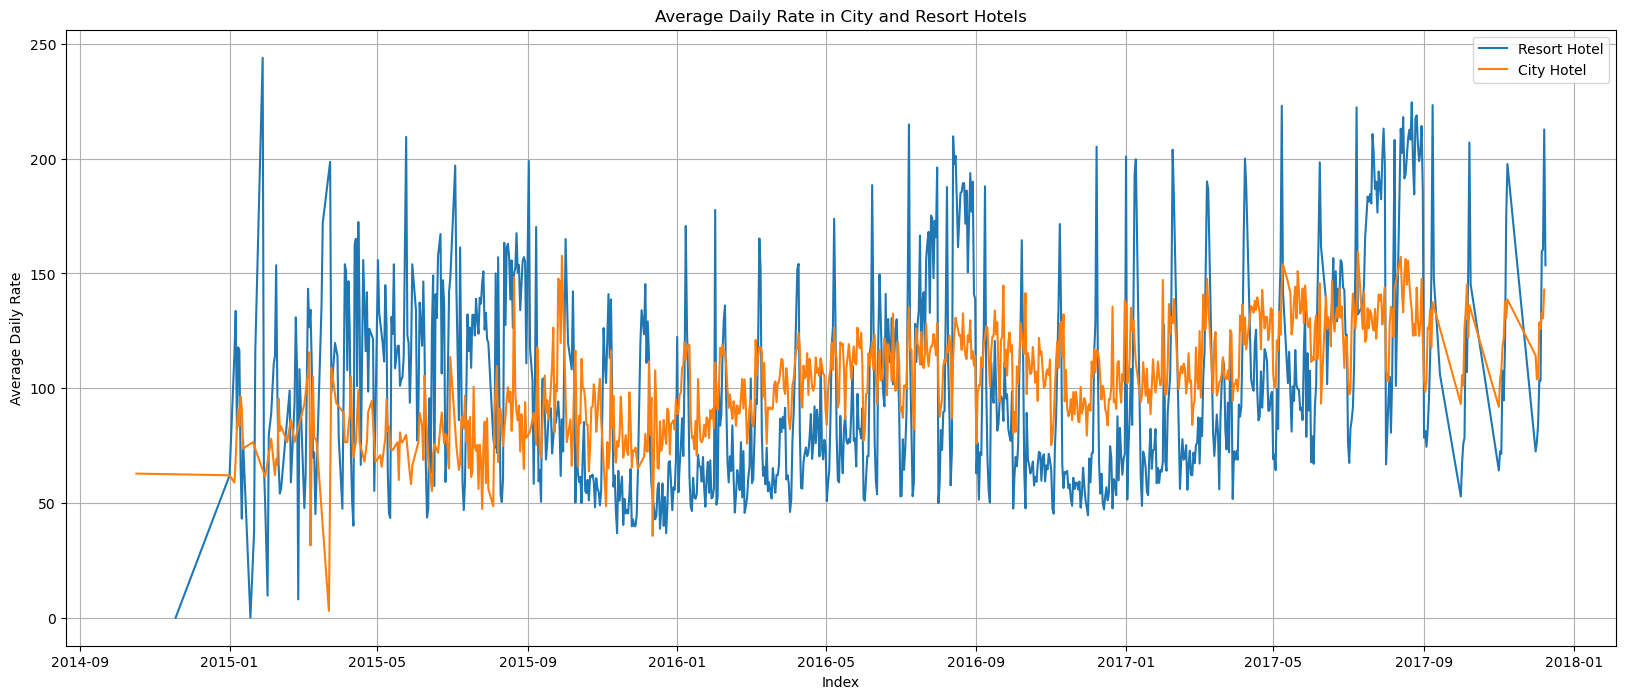

In [91]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotels')

# Ensure the x-axis values are properly aligned
plt.plot(resort_hotel.index, resort_hotel['avg_daily_rate'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['avg_daily_rate'], label='City Hotel')

# Add labels, legend, and grid
plt.xlabel('Index')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()

* we can notice in the chart that some days city hotels prices are lower than resort hotel and on some days city hotel prices are higher than resort hotel. 

<Figure size 1200x600 with 0 Axes>

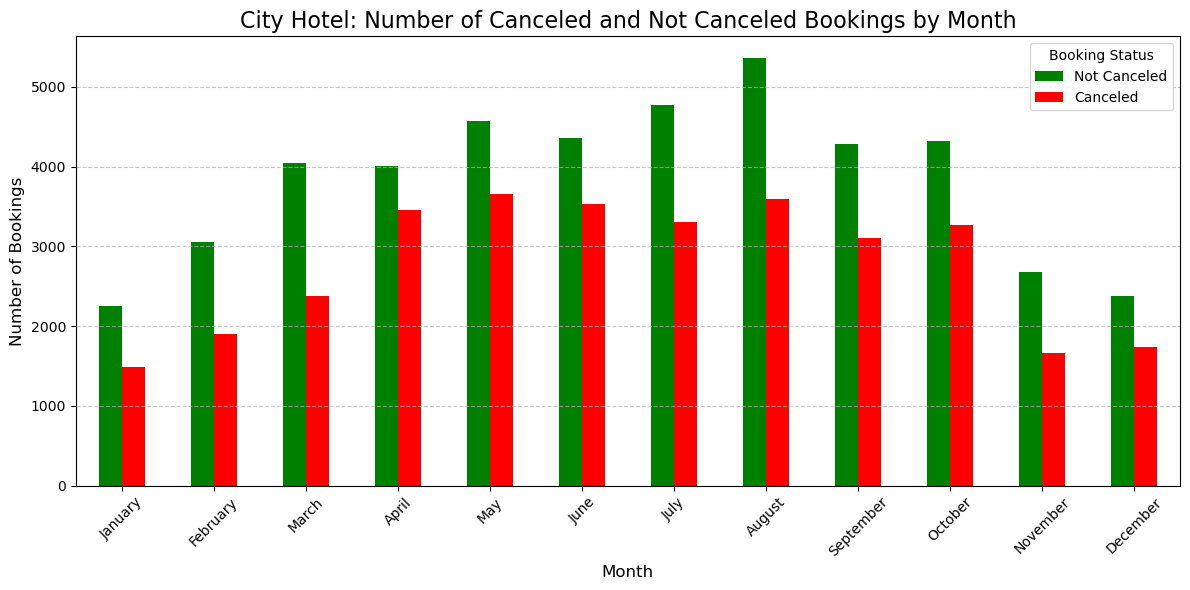

<Figure size 1200x600 with 0 Axes>

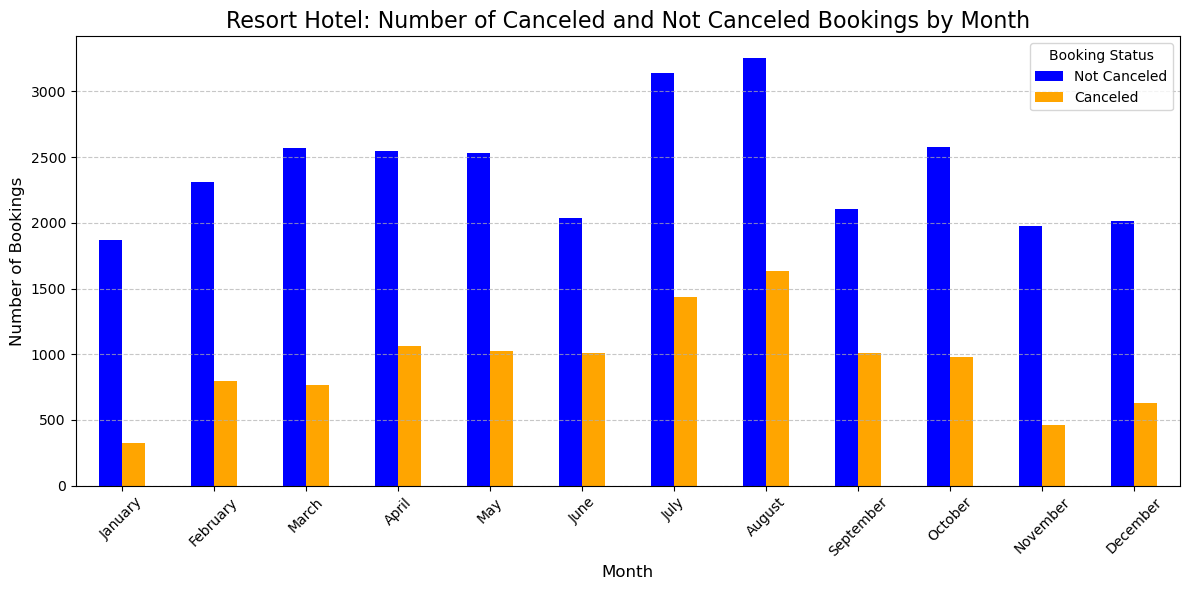

In [93]:
# Separate data for City Hotel and Resort Hotel
city_hotel_data = df[df['hotel_type'] == 'City Hotel']
resort_hotel_data = df[df['hotel_type'] == 'Resort Hotel']

# Group by month and cancellation status
city_monthly_cancellations = city_hotel_data.groupby(['arrival_date_month', 'is_canceled']).size().unstack()
resort_monthly_cancellations = resort_hotel_data.groupby(['arrival_date_month', 'is_canceled']).size().unstack()

# Reorder months (January to December)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
city_monthly_cancellations = city_monthly_cancellations.reindex(month_order)
resort_monthly_cancellations = resort_monthly_cancellations.reindex(month_order)

# Plot for City Hotel
plt.figure(figsize=(12, 6))
city_monthly_cancellations.plot(kind='bar', stacked=False, figsize=(12, 6), color=['green', 'red'])
plt.title('City Hotel: Number of Canceled and Not Canceled Bookings by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'], title='Booking Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for Resort Hotel
plt.figure(figsize=(12, 6))
resort_monthly_cancellations.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])
plt.title('Resort Hotel: Number of Canceled and Not Canceled Bookings by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'], title='Booking Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 **City Hotels**
* The month of August had the most cancellations
* The cancellations were higher for months from April till October these months also had higher bookings

 **Resort Hotels**
* The month of August had highest cancellations

<Figure size 1200x600 with 0 Axes>

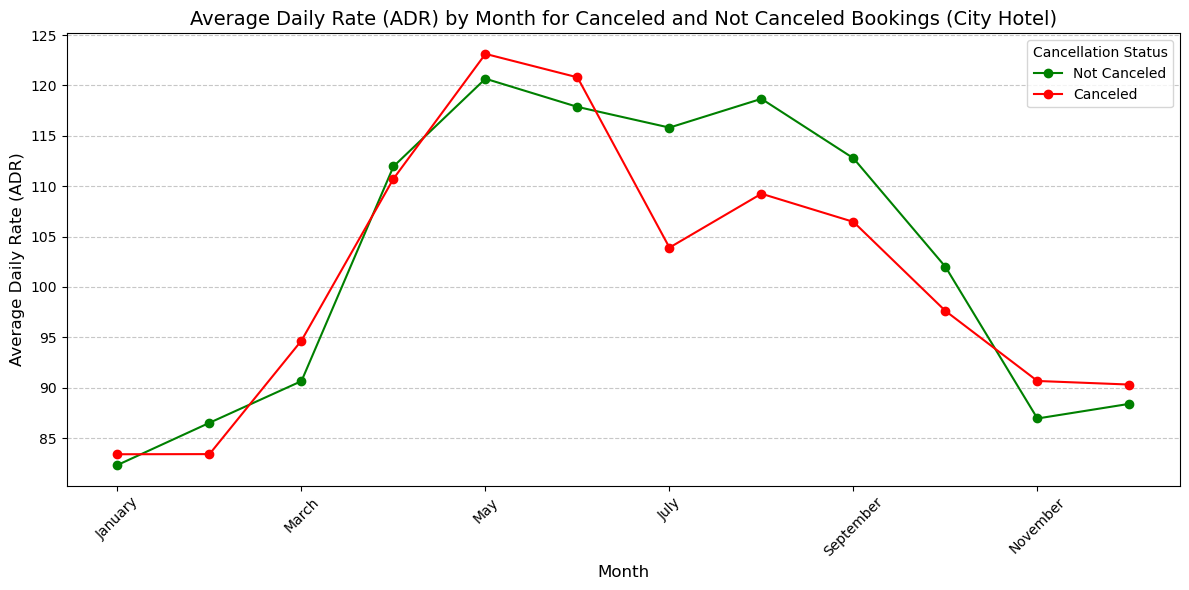

In [95]:
# Filter the dataset for City Hotel
city_hotel_df = df[df['hotel_type'] == 'City Hotel']

# Group by month and cancellation status and calculate the average daily rate
adr_by_month_and_cancellation = city_hotel_df.groupby(['arrival_date_month', 'is_canceled'])['avg_daily_rate'].mean().unstack()

# Reorder the months for proper display (if necessary)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
adr_by_month_and_cancellation = adr_by_month_and_cancellation.reindex(month_order)

# Plotting the data
plt.figure(figsize=(12, 6))
adr_by_month_and_cancellation.plot(kind='line', marker='o', figsize=(12, 6), color=['green', 'red'])

# Adding titles and labels
plt.title('Average Daily Rate (ADR) by Month for Canceled and Not Canceled Bookings (City Hotel)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'], title='Cancellation Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


* City Hotels
* While cancellations sometimes occur for higher-priced bookings (April, May, July ,August), the trend is not consistent across all months.
* This suggests that while ADR may influence cancellations in certain months, it is not the sole driver of cancellations.
* The lack of a consistent pattern where canceled ADR is always higher than not canceled ADR suggests that other factors—such as customer type, booking lead time, or external conditions—might also play a role in cancellations.

<Figure size 1200x600 with 0 Axes>

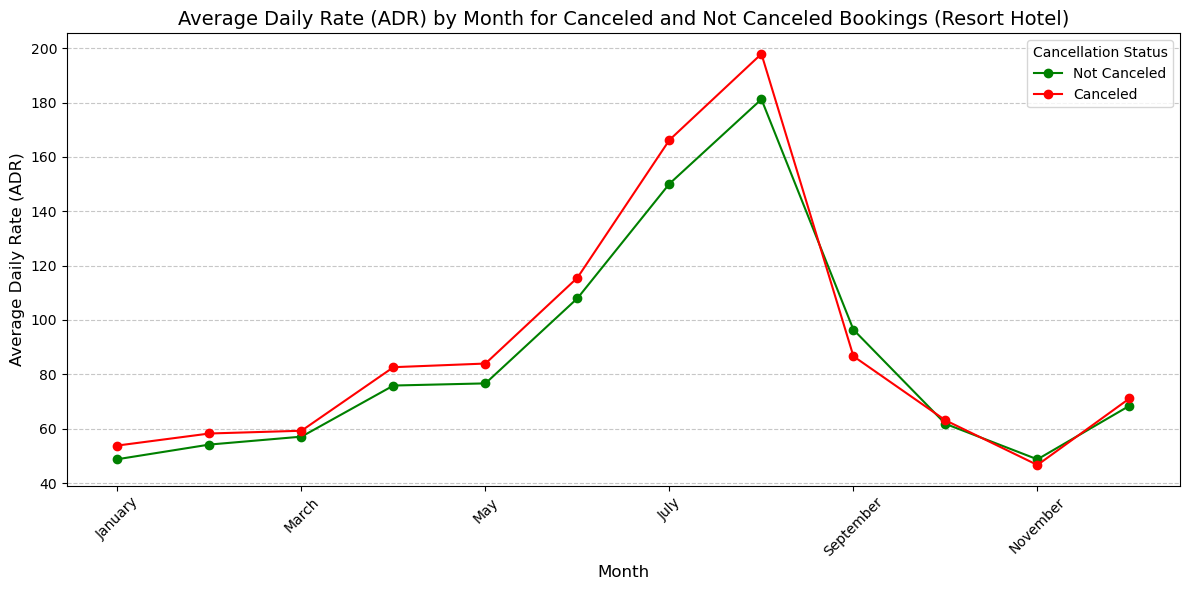

In [97]:
# Filter the dataset for Resort Hotel
resort_hotel_df = df[df['hotel_type'] == 'Resort Hotel']

# Group by month and cancellation status and calculate the average daily rate
adr_by_month_and_cancellation = resort_hotel_df.groupby(['arrival_date_month', 'is_canceled'])['avg_daily_rate'].mean().unstack()

# Reorder the months for proper display (if necessary)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
adr_by_month_and_cancellation = adr_by_month_and_cancellation.reindex(month_order)

# Plotting the data
plt.figure(figsize=(12, 6))
adr_by_month_and_cancellation.plot(kind='line', marker='o', figsize=(12, 6), color=['green', 'red'])

# Adding titles and labels
plt.title('Average Daily Rate (ADR) by Month for Canceled and Not Canceled Bookings (Resort Hotel)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'], title='Cancellation Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


* Resort Hotels
* In Resort Hotels, higher ADR appears to be a significant factor driving cancellations, particularly in the months leading up to and during the peak season (May to August).
* Customers paying higher prices may cancel due to affordability concerns, a change in plans, or opting for alternative accommodations.

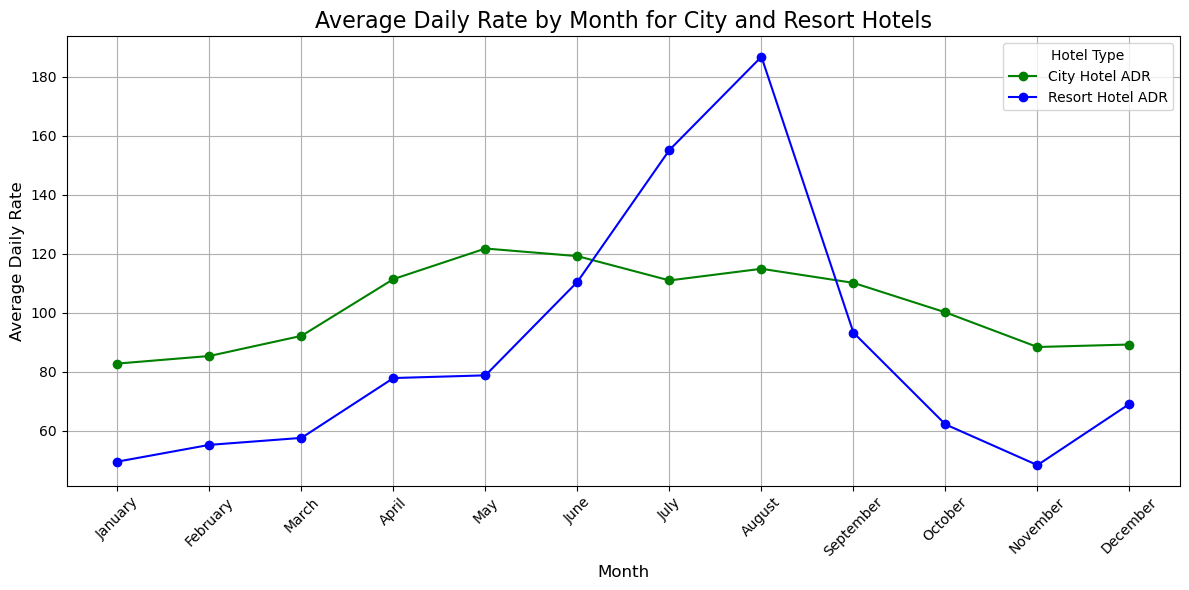

In [99]:
# Separate data for City Hotel and Resort Hotel
city_hotel_data = df[df['hotel_type'] == 'City Hotel']
resort_hotel_data = df[df['hotel_type'] == 'Resort Hotel']

# Calculate average daily rate for City Hotels by month
city_monthly_adr = city_hotel_data.groupby('arrival_date_month')['avg_daily_rate'].mean()

# Calculate average daily rate for Resort Hotels by month
resort_monthly_adr = resort_hotel_data.groupby('arrival_date_month')['avg_daily_rate'].mean()

# Reorder months (January to December)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure the months are in the correct order
city_monthly_adr = city_monthly_adr.reindex(month_order)
resort_monthly_adr = resort_monthly_adr.reindex(month_order)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for City Hotels
plt.plot(city_monthly_adr.index, city_monthly_adr, label='City Hotel ADR', marker='o', color='green')

# Plot for Resort Hotels
plt.plot(resort_monthly_adr.index, resort_monthly_adr, label='Resort Hotel ADR', marker='o', color='blue')

# Add title, labels, and legend
plt.title('Average Daily Rate by Month for City and Resort Hotels', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Top 5 Countries with Highest Cancellations:
country_name
Portugal          27501
United Kingdom     2452
Spain              2177
France             1933
Italy              1333
Name: is_canceled, dtype: int64


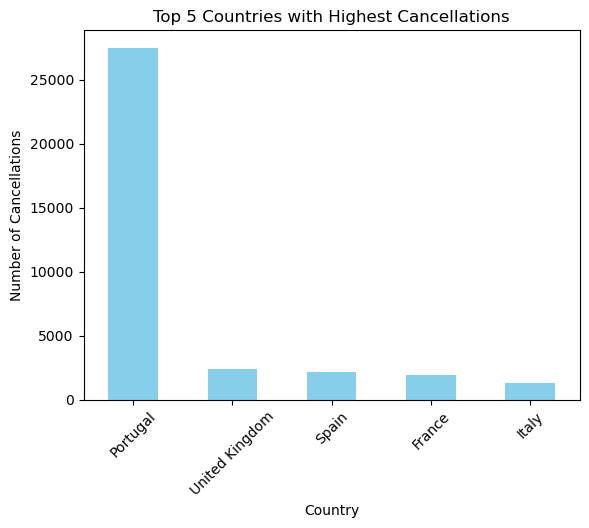

In [101]:
canceled_bookings = df[df['is_canceled'] == 1]

# Group by country and count cancellations
top_canceled_countries = (
    canceled_bookings.groupby('country_name')['is_canceled']
    .count()
    .sort_values(ascending=False)
    .head(5)  # Get top 5 countries
)

# Display the result
print("Top 5 Countries with Highest Cancellations:")
print(top_canceled_countries)

top_canceled_countries.plot(kind='bar', color='skyblue')
plt.title("Top 5 Countries with Highest Cancellations")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.show()

* countries contributing to highest cancellation is portugal , uk ,spain

#### Thank You 